In [1]:
import sklearn
import pandas as pd
import numpy as np
from __future__ import division
import collections
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Convolution1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from sklearn.cross_validation import cross_val_score
from keras.utils import np_utils
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
from sklearn.ensemble import GradientBoostingRegressor
import math
import csv
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
import urllib
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA

Using TensorFlow backend.


# Loading Training Set

In [2]:
xTrain = np.load('xTrain.npy')
yTrain = np.load('yTrain.npy')
#xTrain = xTrain[90000:]
#yTrain = yTrain[90000:]

In [3]:
print xTrain.shape

(115113, 17)


In [4]:
#clf = PCA(0.97) # keep 97% of variance
#X_trans = clf.fit_transform(xTrain)
#print(xTrain.shape)
#print(X_trans.shape)
#xTrain = X_trans

# Training Model

In [5]:
categories=['Wins','PPG','PPGA','PowerConf','3PG', 'APG','TOP','Conference Champ','Tourney Conference Champ',
           'Seed','SOS','SRS', 'RPG', 'SPG', 'Tourney Appearances','National Championships','Location']
df = pd.DataFrame(xTrain, columns=categories)
df.head()

,Wins,PPG,PPGA,PowerConf,3PG,APG,TOP,Conference Champ,Tourney Conference Champ,Seed,SOS,SRS,RPG,SPG,Tourney Appearances,National Championships,Location
0,7.0,15.266129,11.495392,1.0,-0.003456,6.231567,0.0,0.0,0.0,-22.0,13.75,17.34,0.0,4.672811,4.0,0.0,1.0
1,-12.0,-4.501152,9.720046,-1.0,0.109447,-6.464286,-0.0,0.0,0.0,24.0,-15.49,-29.52,-0.0,2.896313,-12.0,-1.0,1.0
2,9.0,14.339719,0.476373,1.0,-0.120051,6.784163,0.0,0.0,0.0,-17.0,5.76,18.88,0.0,5.199234,14.0,0.0,1.0
3,-5.0,-3.200893,1.906250,-1.0,-2.223214,-3.303571,-0.0,0.0,0.0,11.0,-14.70,-20.11,-0.0,0.151786,-5.0,0.0,1.0
4,1.0,-0.855556,0.596296,0.0,0.718519,-0.159259,0.0,0.0,0.0,0.0,2.37,0.92,0.0,-1.944444,10.0,0.0,-1.0


In [6]:
newCategories=['Wins','PPG','PPGA','PowerConf','3PG', 'APG','TOP','Conference Champ','Tourney Conference Champ',
           'SOS','SRS', 'RPG', 'SPG', 'Tourney Appearances','National Championships','Location']
newXtrain = df[newCategories]

In [7]:
newXtrain.head()

,Wins,PPG,PPGA,PowerConf,3PG,APG,TOP,Conference Champ,Tourney Conference Champ,SOS,SRS,RPG,SPG,Tourney Appearances,National Championships,Location
0,7.0,15.266129,11.495392,1.0,-0.003456,6.231567,0.0,0.0,0.0,13.75,17.34,0.0,4.672811,4.0,0.0,1.0
1,-12.0,-4.501152,9.720046,-1.0,0.109447,-6.464286,-0.0,0.0,0.0,-15.49,-29.52,-0.0,2.896313,-12.0,-1.0,1.0
2,9.0,14.339719,0.476373,1.0,-0.120051,6.784163,0.0,0.0,0.0,5.76,18.88,0.0,5.199234,14.0,0.0,1.0
3,-5.0,-3.200893,1.906250,-1.0,-2.223214,-3.303571,-0.0,0.0,0.0,-14.70,-20.11,-0.0,0.151786,-5.0,0.0,1.0
4,1.0,-0.855556,0.596296,0.0,0.718519,-0.159259,0.0,0.0,0.0,2.37,0.92,0.0,-1.944444,10.0,0.0,-1.0


In [8]:
newXtrain.shape

(115113, 16)

In [55]:
model = linear_model.BayesianRidge()
model.fit(newXtrain, yTrain)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [54]:
model = linear_model.BayesianRidge()
X_train, X_test, Y_train, Y_test = train_test_split(newXtrain, yTrain)
results = model.fit(X_train, Y_train)
preds = model.predict(X_test)

preds[preds < .5] = 0
preds[preds >= .5] = 1
print (np.mean(preds == Y_test))

0.76333437576


In [13]:
def handleDifferentCSV(df):
    # The stats CSV is a lit different in terms of naming so below is just some data cleaning
    df['School'] = df['School'].replace('(State)', 'St', regex=True) 
    df['School'] = df['School'].replace('Albany (NY)', 'Albany NY') 
    df['School'] = df['School'].replace('Boston University', 'Boston Univ')
    df['School'] = df['School'].replace('Central Michigan', 'C Michigan')
    df['School'] = df['School'].replace('(Eastern)', 'E', regex=True)
    df['School'] = df['School'].replace('Louisiana St', 'LSU')
    df['School'] = df['School'].replace('North Carolina St', 'NC State')
    df['School'] = df['School'].replace('Southern California', 'USC')
    df['School'] = df['School'].replace('University of California', 'California', regex=True) 
    df['School'] = df['School'].replace('American', 'American Univ')
    df['School'] = df['School'].replace('Arkansas-Little Rock', 'Ark Little Rock')
    df['School'] = df['School'].replace('Arkansas-Pine Bluff', 'Ark Pine Bluff')
    df['School'] = df['School'].replace('Bowling Green St', 'Bowling Green')
    df['School'] = df['School'].replace('Brigham Young', 'BYU')
    df['School'] = df['School'].replace('Cal Poly', 'Cal Poly SLO')
    df['School'] = df['School'].replace('Centenary (LA)', 'Centenary')
    df['School'] = df['School'].replace('Central Connecticut St', 'Central Conn')
    df['School'] = df['School'].replace('Charleston Southern', 'Charleston So')
    df['School'] = df['School'].replace('Coastal Carolina', 'Coastal Car')
    df['School'] = df['School'].replace('College of Charleston', 'Col Charleston')
    df['School'] = df['School'].replace('Cal St Fullerton', 'CS Fullerton')
    df['School'] = df['School'].replace('Cal St Sacramento', 'CS Sacramento')
    df['School'] = df['School'].replace('Cal St Bakersfield', 'CS Bakersfield')
    df['School'] = df['School'].replace('Cal St Northridge', 'CS Northridge')
    df['School'] = df['School'].replace('East Tennessee St', 'ETSU')
    df['School'] = df['School'].replace('Detroit Mercy', 'Detroit')
    df['School'] = df['School'].replace('Fairleigh Dickinson', 'F Dickinson')
    df['School'] = df['School'].replace('Florida Atlantic', 'FL Atlantic')
    df['School'] = df['School'].replace('Florida Gulf Coast', 'FL Gulf Coast')
    df['School'] = df['School'].replace('Florida International', 'Florida Intl')
    df['School'] = df['School'].replace('George Washington', 'G Washington')
    df['School'] = df['School'].replace('Georgia Southern', 'Ga Southern')
    df['School'] = df['School'].replace('Gardner-Webb', 'Gardner Webb')
    df['School'] = df['School'].replace('Illinois-Chicago', 'IL Chicago')
    df['School'] = df['School'].replace('Kent St', 'Kent')
    df['School'] = df['School'].replace('Long Island University', 'Long Island')
    df['School'] = df['School'].replace('Loyola Marymount', 'Loy Marymount')
    df['School'] = df['School'].replace('Loyola (MD)', 'Loyola MD')
    df['School'] = df['School'].replace('Loyola (IL)', 'Loyola-Chicago')
    df['School'] = df['School'].replace('Massachusetts', 'MA Lowell')
    df['School'] = df['School'].replace('Maryland-Eastern Shore', 'MD E Shore')
    df['School'] = df['School'].replace('Miami (FL)', 'Miami FL')
    df['School'] = df['School'].replace('Miami (OH)', 'Miami OH')
    df['School'] = df['School'].replace('Missouri-Kansas City', 'Missouri KC')
    df['School'] = df['School'].replace('Monmouth', 'Monmouth NJ')
    df['School'] = df['School'].replace('Mississippi Valley St', 'MS Valley St')
    df['School'] = df['School'].replace('Montana St', 'MTSU')
    df['School'] = df['School'].replace('Northern Colorado', 'N Colorado')
    df['School'] = df['School'].replace('North Dakota St', 'N Dakota St')
    df['School'] = df['School'].replace('Northern Illinois', 'N Illinois')
    df['School'] = df['School'].replace('Northern Kentucky', 'N Kentucky')
    df['School'] = df['School'].replace('North Carolina A&T', 'NC A&T')
    df['School'] = df['School'].replace('North Carolina Central', 'NC Central')
    df['School'] = df['School'].replace('Pennsylvania', 'Penn')
    df['School'] = df['School'].replace('South Carolina St', 'S Carolina St')
    df['School'] = df['School'].replace('Southern Illinois', 'S Illinois')
    df['School'] = df['School'].replace('UC-Santa Barbara', 'Santa Barbara')
    df['School'] = df['School'].replace('Southeastern Louisiana', 'SE Louisiana')
    df['School'] = df['School'].replace('Southeast Missouri St', 'SE Missouri St')
    df['School'] = df['School'].replace('Stephen F. Austin', 'SF Austin')
    df['School'] = df['School'].replace('Southern Methodist', 'SMU')
    df['School'] = df['School'].replace('Southern Mississippi', 'Southern Miss')
    df['School'] = df['School'].replace('Southern', 'Southern Univ')
    df['School'] = df['School'].replace('St. Bonaventure', 'St Bonaventure')
    df['School'] = df['School'].replace('St. Francis (NY)', 'St Francis NY')
    df['School'] = df['School'].replace('Saint Francis (PA)', 'St Francis PA')
    df['School'] = df['School'].replace('St. John\'s (NY)', 'St John\'s')
    df['School'] = df['School'].replace('Saint Joseph\'s', 'St Joseph\'s PA')
    df['School'] = df['School'].replace('Saint Louis', 'St Louis')
    df['School'] = df['School'].replace('Saint Mary\'s (CA)', 'St Mary\'s CA')
    df['School'] = df['School'].replace('Mount Saint Mary\'s', 'Mt St Mary\'s')
    df['School'] = df['School'].replace('Mount St. Mary\'s', 'Mt St Mary\'s')
    df['School'] = df['School'].replace('Saint Peter\'s', 'St Peter\'s')
    df['School'] = df['School'].replace('Texas A&M-Corpus Christian', 'TAM C. Christian')
    df['School'] = df['School'].replace('Texas Christian', 'TCU')
    df['School'] = df['School'].replace('Tennessee-Martin', 'TN Martin')
    df['School'] = df['School'].replace('Texas-Rio Grande Valley', 'UTRGV')
    df['School'] = df['School'].replace('Texas Southern', 'TX Southern')
    df['School'] = df['School'].replace('Alabama-Birmingham', 'UAB')
    df['School'] = df['School'].replace('UC-Davis', 'UC Davis')
    df['School'] = df['School'].replace('UC-Irvine', 'UC Irvine')
    df['School'] = df['School'].replace('UC-Riverside', 'UC Riverside')
    df['School'] = df['School'].replace('Central Florida', 'UCF')
    df['School'] = df['School'].replace('Louisiana-Lafayette', 'ULL')
    df['School'] = df['School'].replace('Louisiana-Monroe', 'ULM')
    df['School'] = df['School'].replace('Maryland-Baltimore County', 'UMBC')
    df['School'] = df['School'].replace('North Carolina-Asheville', 'UNC Asheville')
    df['School'] = df['School'].replace('North Carolina-Greensboro', 'UNC Greensboro')
    df['School'] = df['School'].replace('North Carolina-Wilmington', 'UNC Wilmington')
    df['School'] = df['School'].replace('Nevada-Las Vegas', 'UNLV')
    df['School'] = df['School'].replace('Texas-Arlington', 'UT Arlington')
    df['School'] = df['School'].replace('Texas-San Antonio', 'UT San Antonio')
    df['School'] = df['School'].replace('Texas-El Paso', 'UTEP')
    df['School'] = df['School'].replace('Virginia Commonwealth', 'VA Commonwealth')
    df['School'] = df['School'].replace('Western Carolina', 'W Carolina')
    df['School'] = df['School'].replace('Western Illinois', 'W Illinois')
    df['School'] = df['School'].replace('Western Kentucky', 'WKU')
    df['School'] = df['School'].replace('Western Michigan', 'W Michigan')
    df['School'] = df['School'].replace('Abilene Christian', 'Abilene Chr')
    df['School'] = df['School'].replace('Montana State', 'Montana St')
    df['School'] = df['School'].replace('Central Arkansas', 'Cent Arkansas')
    df['School'] = df['School'].replace('Houston Baptist', 'Houston Bap')
    df['School'] = df['School'].replace('South Dakota St', 'S Dakota St')
    df['School'] = df['School'].replace('Maryland-Eastern Shore', 'MD E Shore')
    return df

In [14]:
# Function for handling the annoying cases of Florida and FL, as well as State and St
def handleCases(arr):
    indices = []
    listLen = len(arr)
    for i in range(listLen):
        if (arr[i] == 'St' or arr[i] == 'FL'):
            indices.append(i)
    for p in indices:
        arr[p-1] = arr[p-1] + ' ' + arr[p]
    for i in range(len(indices)): 
        arr.remove(arr[indices[i] - i])
    return arr

In [15]:
listACCteams = ['North Carolina','Virginia','Florida St','Louisville','Notre Dame','Syracuse','Duke','Virginia Tech','Georgia Tech','Miami','Wake Forest','Clemson','NC State','Boston College','Pittsburgh']
listPac12teams = ['Arizona','Oregon','UCLA','California','USC','Utah','Washington St','Stanford','Arizona St','Colorado','Washington','Oregon St']
listSECteams = ['Kentucky','South Carolina','Florida','Arkansas','Alabama','Tennessee','Mississippi St','Georgia','Ole Miss','Vanderbilt','Auburn','Texas A&M','LSU','Missouri']
listBig10teams = ['Maryland','Wisconsin','Purdue','Northwestern','Michigan St','Indiana','Iowa','Michigan','Penn St','Nebraska','Minnesota','Illinois','Ohio St','Rutgers']
listBig12teams = ['Kansas','Baylor','West Virginia','Iowa St','TCU','Kansas St','Texas Tech','Oklahoma St','Texas','Oklahoma']
listBigEastteams = ['Butler','Creighton','DePaul','Georgetown','Marquette','Providence','Seton Hall','St John\'s','Villanova','Xavier']

In [16]:
def checkPower6Conference(team_id):
    teamName = teams_pd.values[team_id-1101][1]
    if (teamName in listACCteams or teamName in listBig10teams or teamName in listBig12teams
       or teamName in listSECteams or teamName in listPac12teams or teamName in listBigEastteams):
        return 1
    else:
        return 0

In [17]:
conference_pd = pd.read_csv('Conference.csv')
tourney_seeds_pd = pd.read_csv('TourneySeeds.csv')
tourney_results_pd = pd.read_csv('TourneyResults.csv')
NCAAChampionsList = tourney_results_pd['NCAA Champion'].tolist()

In [18]:
def checkConferenceChamp(team_id, year):
    name = getTeamName(team_id)
    champs =['SMU','North Carolina','Vermont','Dayton','FL Gulf Coast','Villanova','North Dakota',
            'Winthrop','Purdue','Kansas','UC Irvine','UNC Wilmington','Middle Tennessee St','Oakland',
            'Princeton','Monmouth','Akron','NC Central','Wichita St','Nevada','Mt St. Mary\'s',
            'Arizona','Bucknell','Kentucky','East Tennessee St','New Orleans','South Dakota','Texas Southern',
            'Gonzaga']
    if (name in champs):
        return 1
    else:
        return 0

In [19]:
def getTourneyAppearances(team_id):
    return len(tourney_seeds_pd[tourney_seeds_pd['Team'] == team_id].index)

In [20]:
def checkConferenceTourneyChamp(team_id, year):
    name = getTeamName(team_id)
    champs =['SMU','Duke','Vermont','Rhode Island','FL Gulf Coast','Villanova','North Dakota',
            'Winthrop','Michigan','Iowa St','UC Davis','UNC Wilmington','Middle Tennessee St','Northern Kentucky',
            'Princeton','Iona','Kent St','NC Central','Wichita St','Nevada','Mt St. Mary\'s','Jacksonville St',
            'Arizona','Bucknell','Kentucky','East Tennessee St','New Orleans','S Dakota St','Troy','Texas Southern',
            'New Mexico St','Gonzaga']
    if (name in champs):
        return 1
    else:
        return 0

In [21]:
def getTeamName(team_id):
    return teams_pd[teams_pd['Team_Id'] == team_id].values[0][1]

In [22]:
def getNumChampionships(team_id):
    name = getTeamName(team_id)
    return NCAAChampionsList.count(name)

In [39]:
def predictGame(team_1_vector, team_2_vector, home):
    diff = [a - b for a, b in zip(team_1_vector, team_2_vector)]
    diff.append(home)
    #return model.predict_proba([diff])
    return model.predict([diff])

In [24]:
teams_pd = pd.read_csv('Teams.csv')
teams_pd.describe()

,Team_Id
count,364.000000
mean,1282.500000
std,105.221988
min,1101.000000
25%,1191.750000
50%,1282.500000
75%,1373.250000
max,1464.000000


In [25]:
def getSeasonData(team_id, year):    
    stats_SOS_pd = pd.read_csv('MMStats/MMStats_'+str(year)+'.csv')
    stats_SOS_pd = handleDifferentCSV(stats_SOS_pd)
    ratings_pd = pd.read_csv('RatingStats/RatingStats_'+str(year)+'.csv')
    ratings_pd = handleDifferentCSV(ratings_pd)
    
    name = getTeamName(team_id)
    team = stats_SOS_pd[stats_SOS_pd['School'] == name]
    team_rating = ratings_pd[ratings_pd['School'] == name]
    if (len(team.index) == 0 or len(team_rating.index) == 0): #Can't find the team
        total3sMade = 0
        totalTurnovers = 0
        totalAssists = 0
        sos = 0
        totalRebounds = 0
        srs = 0
        totalSteals = 0
        totalPointsScored = 0
        totalPointsAllowed = 0
        numGames = 0
        
    else:
        avgPointsScored = team_rating['Pts'].values[0]
        avgPointsAllowed = team_rating['Opp'].values[0]
        numWins = team_rating['W'].values[0]
        numLosses = team_rating['L'].values[0]
        numGames = numWins + numLosses
        total3sMade = team['X3P'].values[0]
        totalTurnovers = team['TOV'].values[0]
        if (math.isnan(totalTurnovers)):
            totalTurnovers = 0
        totalAssists = team['AST'].values[0]
        if (math.isnan(totalAssists)):
            totalAssists = 0
        sos = team['SOS'].values[0]
        srs = team['SRS'].values[0]
        totalRebounds = team['TRB'].values[0]
        if (math.isnan(totalRebounds)):
            totalRebounds = 0
        totalSteals = team['STL'].values[0]
        if (math.isnan(totalSteals)):
            totalSteals = 0
    
    #Finding tournament seed for that year

    # There are some teams who may have dropped to Division 2, so they won't have games 
    # a certain year. In this case, we don't want to divide by 0, so we'll just set the
    # averages to 0 instead
    if numGames == 0:
        avgPointsScored = 0
        avgPointsAllowed = 0
        avg3sMade = 0
        avgTurnovers = 0
        avgAssists = 0
        avgRebounds = 0
        avgSteals = 0
    else:
        avg3sMade = total3sMade/numGames
        avgTurnovers = totalTurnovers/numGames
        avgAssists = totalAssists/numGames
        avgRebounds = totalRebounds/numGames
        avgSteals = totalSteals/numGames
    return [numWins, avgPointsScored, avgPointsAllowed, checkPower6Conference(team_id), avg3sMade, avgAssists, avgTurnovers,
           checkConferenceChamp(team_id, year), checkConferenceTourneyChamp(team_id, year), 
            sos, srs, avgRebounds, avgSteals, getTourneyAppearances(team_id), getNumChampionships(team_id)]

In [57]:
import random
for i in range(1):
    team1name = 'Arizona'
    team2name = 'Yale'
    team1_vector = getSeasonData(teams_pd[teams_pd['Team_Name'] == team1name].values[0][0], 2017)
    team2_vector = getSeasonData(teams_pd[teams_pd['Team_Name'] == team2name].values[0][0], 2017)
    team_1_win = predictGame(team1_vector, team2_vector, 0)
    if (team_1_win > random.random()):
        print team1name, 'Wins'
        print team_1_win
    else:
        print team2name, 'Wins'
        print team_1_win

Arizona Wins
[ 0.97009258]


In [27]:
def showFeatureImportance(my_categories):
    fx_imp = pd.Series(model.feature_importances_, index=my_categories)
    fx_imp /= fx_imp.max()
    fx_imp.sort()
    fx_imp.plot(kind='barh')

/Users/adit/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


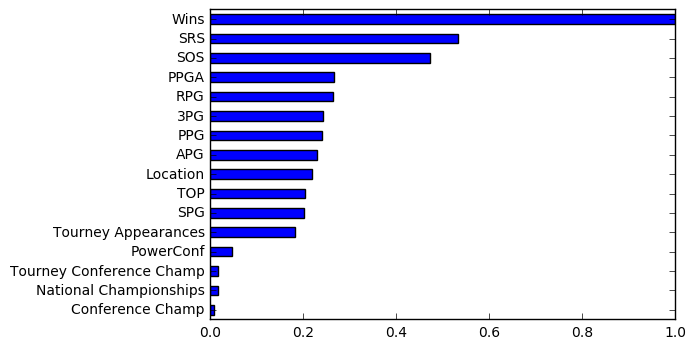

In [28]:
showFeatureImportance(newCategories)

In [29]:
sample_sub_pd = pd.read_csv('samplesubmission2017.csv')
(sample_sub_pd.head())

,Id,Pred
0,2017_1112_1116,0.5
1,2017_1112_1124,0.5
2,2017_1112_1137,0.5
3,2017_1112_1139,0.5
4,2017_1112_1153,0.5


In [58]:
def createPrediction():
    results = [[0 for x in range(2)] for x in range(len(sample_sub_pd.index))]
    for index, row in sample_sub_pd.iterrows():
        matchup_id = row['Id']
        year = matchup_id[0:4]
        team1_id = matchup_id[5:9]
        team2_id = matchup_id[10:14]
        team1_vector = getSeasonData(int(team1_id), int(year))
        team2_vector = getSeasonData(int(team2_id), int(year))
        pred = predictGame(team1_vector, team2_vector, 0)
        results[index][0] = matchup_id
        results[index][1] = pred[0]
        #results[index][1] = pred[0][1]
    results = pd.np.array(results)
    firstRow = [[0 for x in range(2)] for x in range(1)]
    firstRow[0][0] = 'id'
    firstRow[0][1] = 'pred'
    with open("predictions2017.csv", "wb") as f:
        writer = csv.writer(f)
        writer.writerows(firstRow)
        writer.writerows(results)

In [59]:
model = linear_model.BayesianRidge()
model.fit(newXtrain, yTrain)
createPrediction()